# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
#import all needed items
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
import pandas as pd


In [11]:
#Create Engine and connect to the Hawaii SQL file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

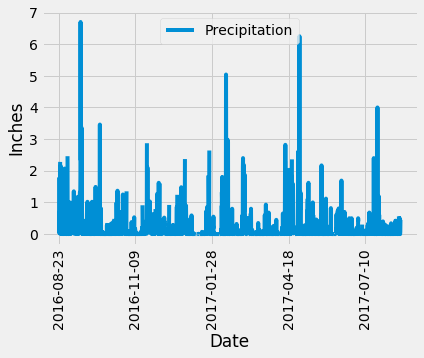

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#Find last date entry
last = (session.query(measurement.date).order_by(measurement.date.desc()).first())
#create a minus a year value to minus from last date entry 
days = dt.timedelta(365)
#Split the last date 
Llist = last.date.split('-')
#take split date and make it a date value 
date = dt.date(int(Llist[0]),int(Llist[1]),int(Llist[2]))
#Get a year back from last date entry
date = date - days

# Perform a query to retrieve the data and precipitation scores
prcp = pd.DataFrame(session.query(measurement.date, measurement.prcp).filter(measurement.date>=date).all(),columns=['Date','Precipitation'])
#drop empty rows
prcp.dropna()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = prcp.set_index('Date',inplace = False)
# # Sort the dataframe by date
#make sure DF is still a DF
prcp = pd.DataFrame(prcp)
prcp = prcp.sort_values('Date')

# Make sure column is a number(integer)
prcp['Precipitation'] = pd.to_numeric(prcp['Precipitation'])
# # Use Pandas Plotting with Matplotlib to plot the data

# Create a plot and allow pandas to choose plot, then rotate the x ticks 90 degrees
ax = prcp.plot(rot=90)
#Set the Y label
ax.set_ylabel("Inches")
# Show the plot
plt.show()


In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to show how many stations are available in this dataset?
# Finding the number of Stations availible(from the station table)
station_count = session.query(station.station).group_by(station.station).count()
print(f'There are {station_count} Stationss availible in this dataset')

# Finding the number of Stations used in the Dataset
station_count = session.query(measurement.station).group_by(measurement.station).count()
print(f'There are {station_count} Stations in this dataset')

There are 9 Stationss availible in this dataset
There are 9 Stations in this dataset


In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_count = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station)  \
    .order_by(func.count(measurement.date).asc())
station_count.all()



[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [66]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_temp = session.query( func.min(measurement.tobs), func.max(measurement.tobs),\
                             func.avg(measurement.tobs)).filter(measurement.station=='USC00519281')

station_temp.all()

[(54.0, 85.0, 71.66378066378067)]

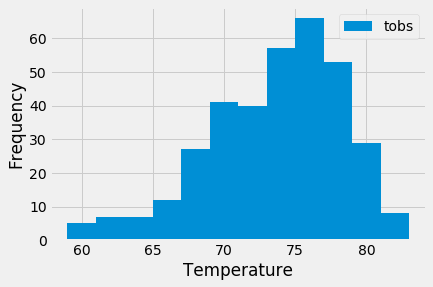

In [79]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp = pd.DataFrame(session.query(measurement.tobs).filter(measurement.date>=date).  \
                        filter(measurement.station=='USC00519281').all())
# Create the histogram plot with 12 bins
ax1 = temp.plot.hist(bins=12)
# setting the x label
ax1.set_xlabel("Temperature")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
